In [15]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [43]:
# Paths to images and CSV file
images_folder = "/Volumes/PC and Mac/Plant_net/downloaded_images_5000_2.0"
csv_file = "/Volumes/PC and Mac/Plant_net/image_types_5000_2.0.csv"

# Load the CSV
data = pd.read_csv(csv_file)

# Append the full path to the filenames
data['image_filename'] = data['image_filename'].apply(lambda x: os.path.join(images_folder, x))

# Map labels to numeric values
class_mapping = {'flower': 0, 'leaf': 1, 'bark': 2, 'fruit': 3}
data['type'] = data['type'].map(class_mapping)

# Shuffle the data
data = shuffle(data, random_state=42)  # Random seed ensures reproducibility


# Split the data into train (70%), validation (15%), and test (15%)
train_data, temp_data = train_test_split(data, test_size=0.3, stratify=data['type'], random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.33, stratify=temp_data['type'], random_state=42)


# Convert numeric labels to strings
data['type'] = data['type'].astype(str)

# Ensure that all subsets (train, val, test) have string labels
train_data['type'] = train_data['type'].astype(str)
val_data['type'] = val_data['type'].astype(str)
test_data['type'] = test_data['type'].astype(str)


print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")


Training set size: 3500
Validation set size: 1005
Test set size: 495


In [44]:
# Function to count images per class in a dataset
def count_images_per_class(dataset):
    counts = dataset['type'].value_counts().sort_index()  # Get counts sorted by class name
    for class_name, count in counts.items():
        print(f"{class_name}: {count} images")
    print()

# Print counts for each dataset
print("Training Set:")
count_images_per_class(train_data)

print("Validation Set:")
count_images_per_class(val_data)

print("Test Set:")
count_images_per_class(test_data)


Training Set:
0: 1009 images
1: 762 images
2: 1550 images
3: 179 images

Validation Set:
0: 290 images
1: 218 images
2: 445 images
3: 52 images

Test Set:
0: 143 images
1: 108 images
2: 219 images
3: 25 images



In [45]:
# Parameters for the model
image_size = (128, 128)  # Resize all images to 128x128
batch_size = 32          # Batch size for training

# Data generator for training with augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,            # Normalize pixel values to [0, 1]
    rotation_range=20,            # Random rotation
    width_shift_range=0.2,        # Random horizontal shift
    height_shift_range=0.2,       # Random vertical shift
    shear_range=0.2,              # Random shear
    zoom_range=0.2,               # Random zoom
    horizontal_flip=True,         # Random horizontal flip
    fill_mode='nearest'
)

# Data generator for validation and test (no augmentation)
test_val_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create generators
train_generator = train_datagen.flow_from_dataframe(
    train_data,
    x_col='image_filename',
    y_col='type',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'  # Multi-class classification
)

val_generator = test_val_datagen.flow_from_dataframe(
    val_data,
    x_col='image_filename',
    y_col='type',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_val_datagen.flow_from_dataframe(
    test_data,
    x_col='image_filename',
    y_col='type',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Do not shuffle for evaluation
)

Found 3500 validated image filenames belonging to 4 classes.
Found 1005 validated image filenames belonging to 4 classes.
Found 495 validated image filenames belonging to 4 classes.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Build the CNN model
model1 = Sequential([
    # Input layer
    Input(shape=(128, 128, 3)),  # Specify input shape here

    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(4, activation='softmax')  # 4 classes
])

In [62]:
config1 = model1.get_config()
print(config1)


{'name': 'sequential_5', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 128, 128, 3), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_5'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_15', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'regist

In [17]:
model1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compile the model
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # For multi-class classification
    metrics=['accuracy']
)

In [20]:
test_loss, test_accuracy = model1.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

/Users/louise/Desktop/UNIL/machine learning/exa/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 630ms/step - accuracy: 0.0764 - loss: 1.4080
Test Loss: 1.4064
Test Accuracy: 0.0848


In [21]:
# Train the model
history = model1.fit(
    train_generator,
    epochs=20,  # Adjust based on your dataset
    validation_data=val_generator
)

/Users/louise/Desktop/UNIL/machine learning/exa/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.5658 - loss: 1.0684 - val_accuracy: 0.7940 - val_loss: 0.6995
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.7620 - loss: 0.6810 - val_accuracy: 0.8000 - val_loss: 0.5362
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.8073 - loss: 0.5748 - val_accuracy: 0.8418 - val_loss: 0.5290
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.8140 - loss: 0.5348 - val_accuracy: 0.8527 - val_loss: 0.4308
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.8270 - loss: 0.5068 - val_accuracy: 0.8398 - val_loss: 0.4420
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.8037 - loss: 0.5555 - val_accuracy: 0.8587 - val_loss: 0.4392
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.8261 - loss: 0.5005 - val_accuracy: 0.8060 - val_loss: 0.5309
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.8198 - loss: 0.5117 - val_accu

In [9]:
test_loss1, test_accuracy1 = model1.evaluate(test_generator)
print(f"Test Loss: {test_loss1:.4f}")
print(f"Test Accuracy: {test_accuracy1:.4f}")

/Users/louise/Desktop/UNIL/machine learning/exa/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 641ms/step - accuracy: 0.8937 - loss: 0.3321
Test Loss: 0.3541
Test Accuracy: 0.8768


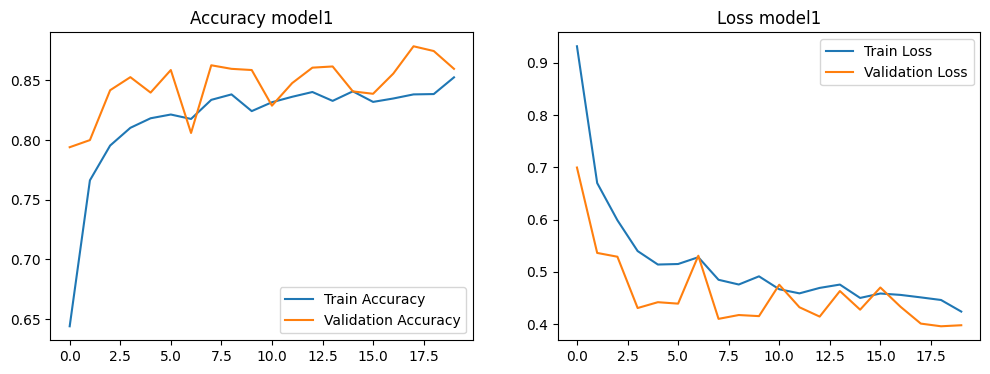

In [26]:
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy model1')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss model1')

plt.savefig('/Volumes/PC and Mac/Plant_net/model1_accuracy.png', dpi=300)

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Step 1: Predict on the test dataset
# The test generator's labels are in categorical format (one-hot encoded),
# so we need to use the `classes` attribute for true labels.
test_predictions = model.predict(test_generator)
test_pred_classes = np.argmax(test_predictions, axis=1)  # Convert predictions to class indices
test_true_classes = test_generator.classes  # Get true class indices from the generator

# Step 2: Compute the confusion matrix
cm = confusion_matrix(test_true_classes, test_pred_classes)

# Step 3: Visualize the confusion matrix
labels = list(test_generator.class_indices.keys())  # Get class labels from the generator
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [27]:
model1.save('/Volumes/PC and Mac/Plant_net/flower_leaf_bark_fruit_cnn.h5')

In [46]:
from tensorflow.keras.models import load_model

# Load the model
model1 = load_model('/Volumes/PC and Mac/Plant_net/flower_leaf_bark_fruit_cnn.h5')  # For SavedModel format

# If saved as .h5 file
# model = load_model('/content/my_model.h5')

# Verify the model's architecture
model1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,158 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 669ms/step


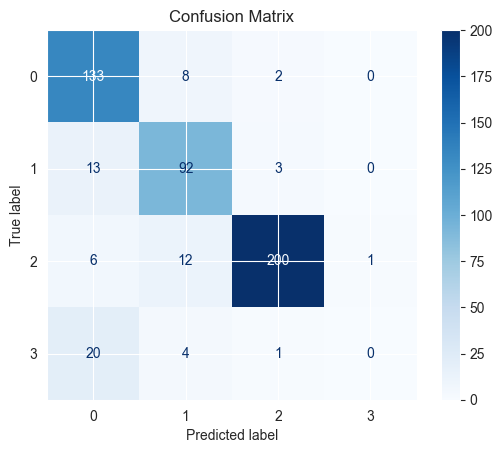

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Step 1: Predict on the test dataset
# The test generator's labels are in categorical format (one-hot encoded),
# so we need to use the `classes` attribute for true labels.
test_predictions = model1.predict(test_generator)
test_pred_classes = np.argmax(test_predictions, axis=1)  # Convert predictions to class indices
test_true_classes = test_generator.classes  # Get true class indices from the generator

# Step 2: Compute the confusion matrix
cm = confusion_matrix(test_true_classes, test_pred_classes)

# Step 3: Visualize the confusion matrix
labels = list(test_generator.class_indices.keys())  # Get class labels from the generator
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.savefig('/Volumes/PC and Mac/Plant_net/model1_confusion_matrix.png', dpi=300)

plt.show()


In [58]:
# Calculate MCC for each class
def calculate_mcc(cm):
    mcc_list = []
    num_classes = cm.shape[0]

    for i in range(num_classes):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = cm.sum() - (TP + FP + FN)

        numerator = TP * TN - FP * FN
        denominator = np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

        if denominator != 0:
            mcc = numerator / denominator
        else:
            mcc = 0  # If denominator is zero, MCC is undefined, so we set it to zero

        mcc_list.append(mcc)

    return np.mean(mcc_list)  # Return the mean MCC across all classes

# Calculate and print the Multiclass MCC
mcc_score = calculate_mcc(cm)
print(f"Multiclass MCC: {mcc_score}")

Multiclass MCC: 0.6094663502191144


##M4 model

In [26]:
#import a pretrained dataset
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from tensorflow.keras.applications import VGG16

# Use local weights file
conv_base = VGG16(weights='/Volumes/PC and Mac/Plant_net/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False)

# freeze the weights
for layer in conv_base.layers:
    layer.trainable = False

model4 = Sequential([
    Input(shape=(128, 128, 3)),  # Input shape
    conv_base,                   # Pre-trained VGG16 as the base
    Flatten(name='flatten'),     # Flatten the features
    Dropout(0.2),                # Dropout for regularization
    Dense(256, activation='relu', name='dense_1'),  # Fully connected layer
    Dropout(0.2),                # Another Dropout layer
    Dense(4, activation='softmax', name='dense_2')  # 4 classes
])

# Compile the model
model4.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # For one-hot encoded labels
    metrics=['accuracy']
)

In [27]:
history = model4.fit(train_generator,
    epochs=20,  # Adjust based on your dataset
    validation_data=val_generator)

Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6896 - loss: 1.0524

/Users/louise/Desktop/UNIL/machine learning/exa/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


110/110 ━━━━━━━━━━━━━━━━━━━━ 593s 5s/step - accuracy: 0.6902 - loss: 1.0494 - val_accuracy: 0.8149 - val_loss: 0.4829
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 475s 4s/step - accuracy: 0.7981 - loss: 0.5067 - val_accuracy: 0.8388 - val_loss: 0.4176
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 482s 4s/step - accuracy: 0.8211 - loss: 0.4771 - val_accuracy: 0.8527 - val_loss: 0.4032
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 541s 5s/step - accuracy: 0.8414 - loss: 0.4209 - val_accuracy: 0.8338 - val_loss: 0.4153
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2261s 21s/step - accuracy: 0.8273 - loss: 0.4244 - val_accuracy: 0.8597 - val_loss: 0.3874
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 478s 4s/step - accuracy: 0.8331 - loss: 0.4246 - val_accuracy: 0.8677 - val_loss: 0.3932
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 390s 4s/step - accuracy: 0.8467 - loss: 0.3917 - val_accuracy: 0.8577 - val_loss: 0.3841
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 387s 4s/step - accuracy: 0.8421 - loss: 0.4022 - val_accuracy: 0.8

In [28]:
test_loss4, test_accuracy4 = model4.evaluate(test_generator)
print(f"Test Loss: {test_loss4:.4f}")
print(f"Test Accuracy: {test_accuracy4:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.8887 - loss: 0.3341
Test Loss: 0.3749
Test Accuracy: 0.8768


16/16 ━━━━━━━━━━━━━━━━━━━━ 75s 5s/step


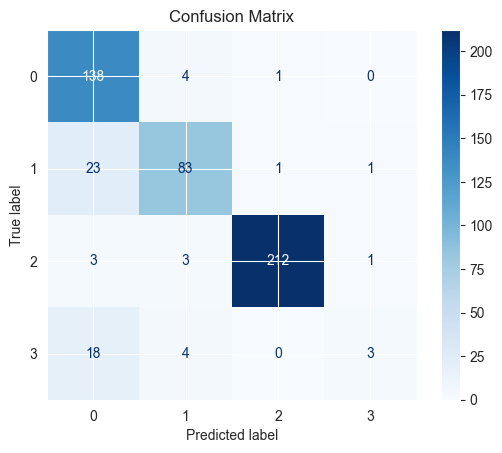

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Step 1: Predict on the test dataset
# The test generator's labels are in categorical format (one-hot encoded),
# so we need to use the `classes` attribute for true labels.
test_predictions = model4.predict(test_generator)
test_pred_classes = np.argmax(test_predictions, axis=1)  # Convert predictions to class indices
test_true_classes = test_generator.classes  # Get true class indices from the generator

# Step 2: Compute the confusion matrix
cm = confusion_matrix(test_true_classes, test_pred_classes)

# Step 3: Visualize the confusion matrix
labels = list(test_generator.class_indices.keys())  # Get class labels from the generator
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.savefig('/Volumes/PC and Mac/Plant_net/model4_confusion_matrix.png', dpi=300)

plt.show()

In [60]:
# Calculate and print the Multiclass MCC
mcc_score_m4 = calculate_mcc(cm)
print(f"Multiclass MCC: {mcc_score_m4}")

Multiclass MCC: 0.6964259834680561


In [33]:
model4.save('/Volumes/PC and Mac/Plant_net/flower_leaf_bark_fruit_cnn4.h5')

In [47]:
from tensorflow.keras.models import load_model

# Load the model
model4 = load_model('/Volumes/PC and Mac/Plant_net/flower_leaf_bark_fruit_cnn4.h5')  # For SavedModel format

# If saved as .h5 file
# model = load_model('/content/my_model.h5')

# Verify the model's architecture
model4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,813,126 (64.14 MB)

 Trainable params: 2,098,436 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load and preprocess multiple images
def preprocess_images(img_paths, target_size=(128, 128)):
    original_images = []
    preprocessed_images = []

    for img_path in img_paths:
        img = load_img(img_path, target_size=target_size)  # Load image
        img_array = img_to_array(img)                     # Convert to array
        img_array = img_array / 255.0                     # Normalize to [0, 1]

        original_images.append(img)
        preprocessed_images.append(img_array)

    preprocessed_images = np.array(preprocessed_images)  # Create a batch
    return original_images, preprocessed_images

# Example usage
img_paths = [
    '/Volumes/PC and Mac/Plant_net/downloaded_images_5000_2.0/image_60.jpg',#bark
    '/Volumes/PC and Mac/Plant_net/downloaded_images_5000_2.0/image_246.jpg',#flower
    '/Volumes/PC and Mac/Plant_net/downloaded_images_5000_2.0/image_368.jpg',#leaf
    '/Volumes/PC and Mac/Plant_net/downloaded_images_5000_2.0/image_383.jpg' #fruit
    #'/Volumes/PC and Mac/Plant_net/downloaded_images_5000_2.0/image_368.jpg' #leaf
    #class_mapping = {'flower': 0, 'leaf': 1, 'bark': 2, 'fruit': 3}
]  # Replace with your image paths
original_imgs, preprocessed_imgs = preprocess_images(img_paths)


In [52]:
import tensorflow as tf

def compute_saliency_maps(model, img_array, class_indices):
    """
    Compute saliency maps for a batch of images and their corresponding class indices.
    """
    img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(img_tensor)  # Watch the input tensor
        predictions = model(img_tensor)  # Forward pass

        # Get scores for the target classes
        class_scores = tf.gather(predictions, class_indices, axis=1, batch_dims=1)

    # Compute the gradients of the scores w.r.t. the input images
    grads = tape.gradient(class_scores, img_tensor)
    saliency_maps = tf.reduce_max(tf.abs(grads), axis=-1)  # Take maximum along color channels
    return saliency_maps.numpy()  # Return saliency maps as a numpy array

# Example: Compute saliency maps for class indices [0, 1, 2, 3] (replace as needed)
class_indices = [2, 0, 1, 3]  # Replace with desired class indices for each image
saliency_maps = compute_saliency_maps(model1, preprocessed_imgs, class_indices)


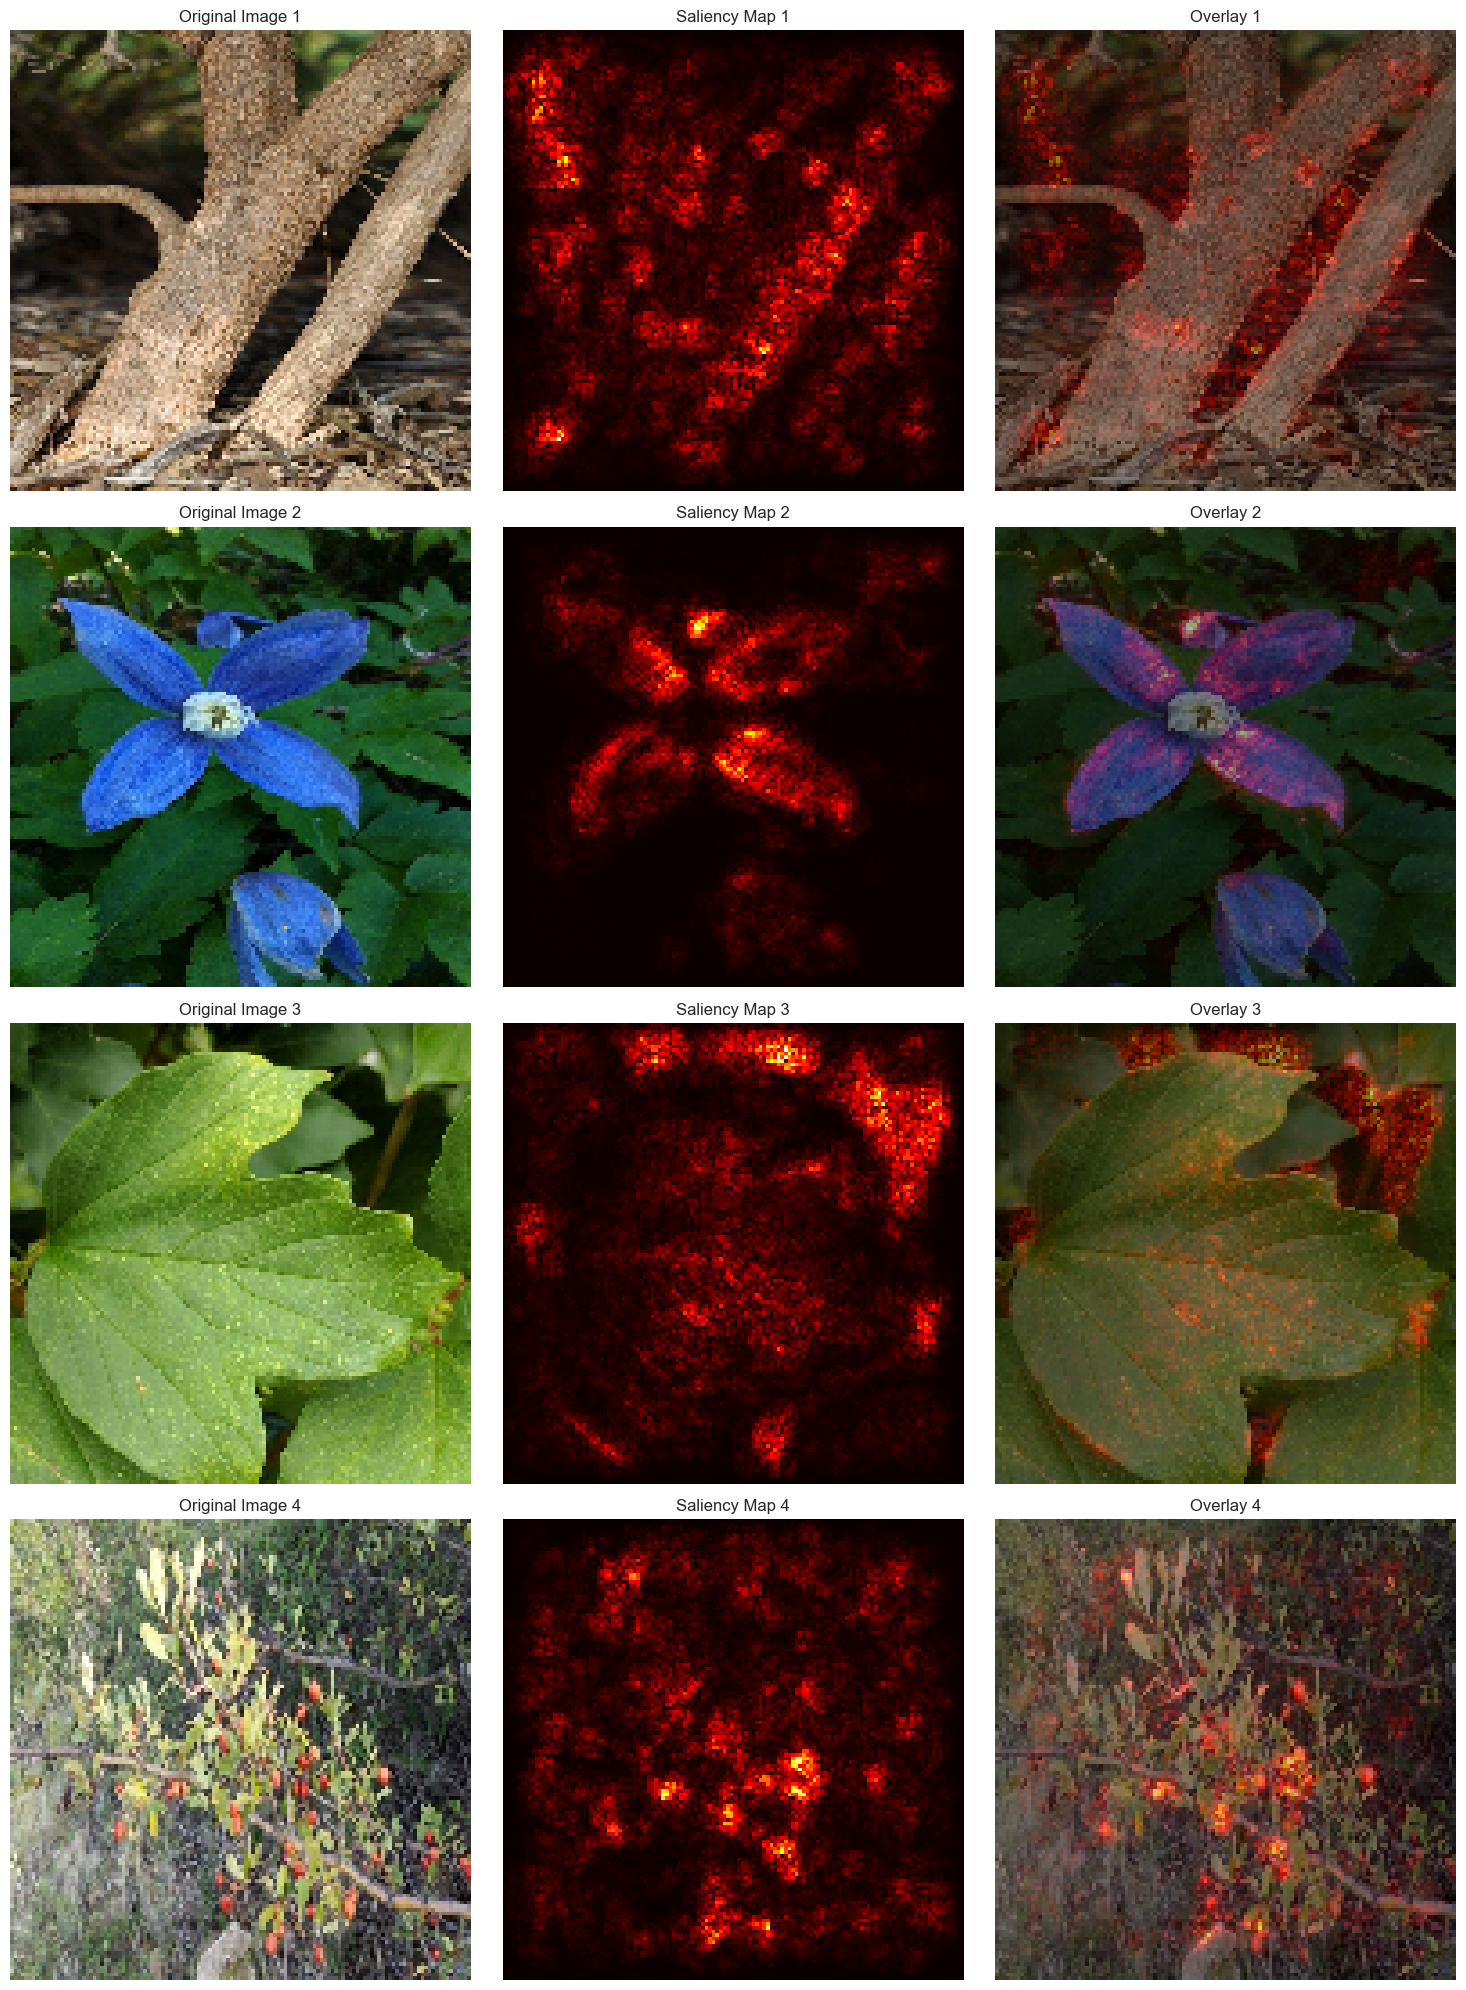

<Figure size 640x480 with 0 Axes>

In [53]:
def plot_saliency_details(original_images, saliency_maps):
    """
    Visualize the original image, the saliency map, and the overlay of the saliency map on the original image.
    """
    num_images = len(original_images)
    plt.figure(figsize=(15, num_images * 5))

    for i, (original_img, saliency_map) in enumerate(zip(original_images, saliency_maps)):
        # Original Image
        plt.subplot(num_images, 3, i * 3 + 1)
        plt.imshow(original_img)
        plt.axis('off')
        plt.title(f"Original Image {i+1}")

        # Saliency Map (standalone)
        plt.subplot(num_images, 3, i * 3 + 2)
        plt.imshow(saliency_map, cmap='hot')
        plt.axis('off')
        plt.title(f"Saliency Map {i+1}")

        # Overlay of Original Image and Saliency Map
        plt.subplot(num_images, 3, i * 3 + 3)
        plt.imshow(original_img)
        plt.imshow(saliency_map, cmap='hot', alpha=0.5)  # Overlay saliency map
        plt.axis('off')
        plt.title(f"Overlay {i+1}")

    plt.tight_layout()
    plt.show()

# Visualize the saliency map details
plot_saliency_details(original_imgs, saliency_maps)
plt.savefig('/Volumes/PC and Mac/Plant_net/model1_saliency_map', dpi=300)


Ensemble model Random Forest

/Users/louise/Desktop/UNIL/machine learning/exa/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 65s 4s/step


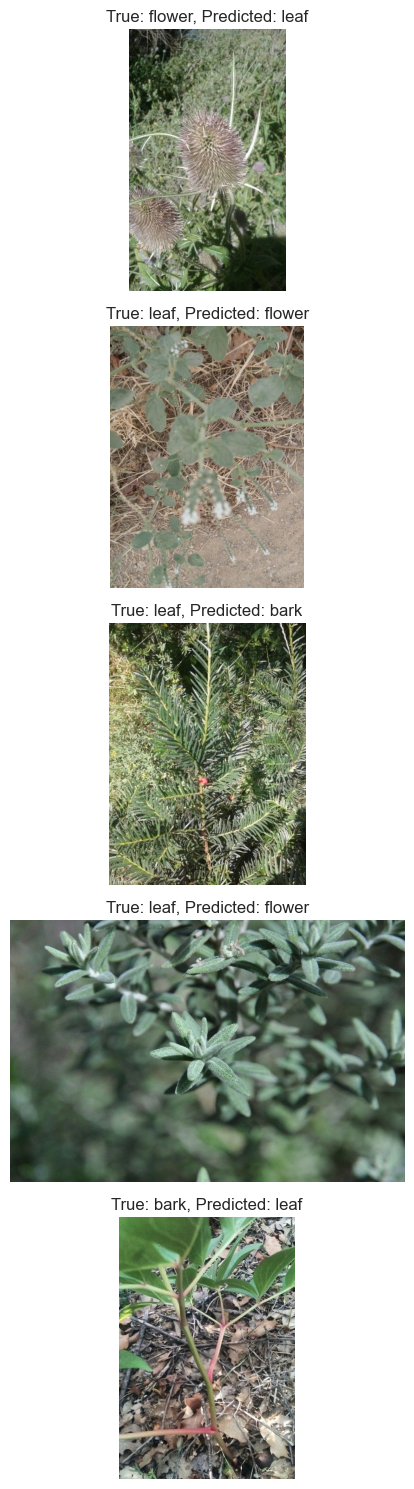

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model and get predictions
y_true = test_generator.classes  # True labels from the test generator
y_pred_probs = model4.predict(test_generator)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class indices

# Find misclassified indices
misclassified_indices = np.where(y_true != y_pred)[0]

# Class labels mapping (update if needed)
class_labels = {0: "flower", 1: "leaf", 2: "bark", 3: "fruit"}

# Display some misclassified images
num_to_display = 5  # Number of images to display
plt.figure(figsize=(15, num_to_display * 3))

for i, idx in enumerate(misclassified_indices[:num_to_display]):
    # Load the misclassified image
    img_path = test_generator.filepaths[idx]
    img = plt.imread(img_path)

    # Plot the image with true and predicted labels
    plt.subplot(num_to_display, 1, i + 1)
    plt.imshow(img)
    plt.title(f"True: {class_labels[y_true[idx]]}, Predicted: {class_labels[y_pred[idx]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 656ms/step


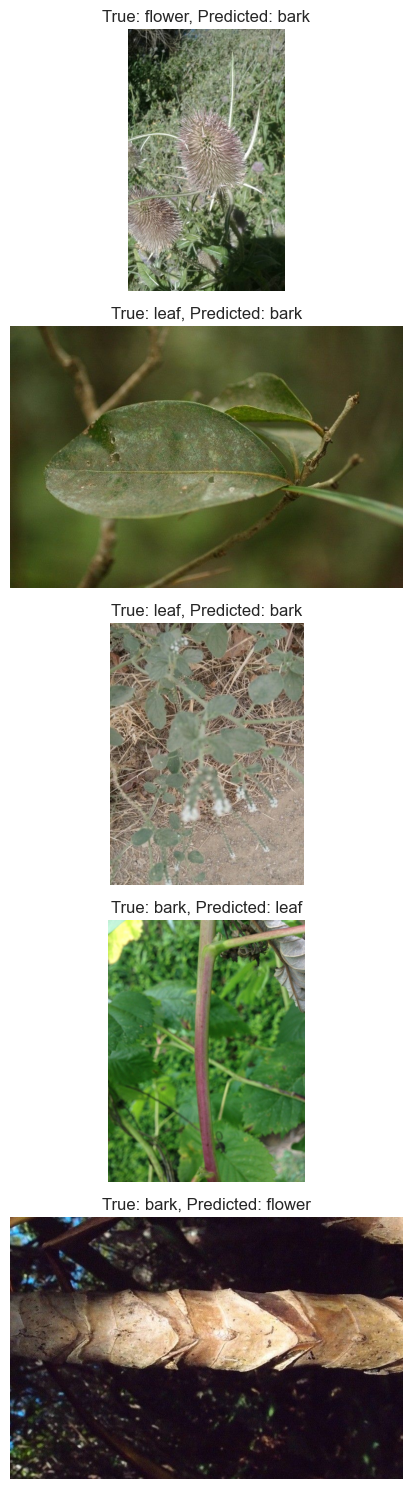

In [55]:
y_true = test_generator.classes  # True labels from the test generator
y_pred_probs = model1.predict(test_generator)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class indices

# Find misclassified indices
misclassified_indices = np.where(y_true != y_pred)[0]

# Class labels mapping (update if needed)
class_labels = {0: "flower", 1: "leaf", 2: "bark", 3: "fruit"}

# Display some misclassified images
num_to_display = 5  # Number of images to display
plt.figure(figsize=(15, num_to_display * 3))

for i, idx in enumerate(misclassified_indices[:num_to_display]):
    # Load the misclassified image
    img_path = test_generator.filepaths[idx]
    img = plt.imread(img_path)

    # Plot the image with true and predicted labels
    plt.subplot(num_to_display, 1, i + 1)
    plt.imshow(img)
    plt.title(f"True: {class_labels[y_true[idx]]}, Predicted: {class_labels[y_pred[idx]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()